Import what will be needed for the exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import sklearn
import csv
import math
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import metrics
from tensorflow.keras.models import load_model

In [2]:
import seaborn as sns 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
#load the dataset
loan_data = pd.read_csv('../datasets/synthesized_loan_data.csv')

In [4]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1.015491,0,0,60,2263.426739,120.264574,362.034926,0.999618,2,1
1,1,1,2.793550,1,2,299,207.078743,97.333547,185.855127,0.994450,1,1
2,0,0,1.020575,0,1,497,-222.105153,98.957504,361.411489,0.999132,0,1
3,1,1,0.967628,0,0,35,1874.200797,141.121981,360.427013,0.999273,2,1
4,1,1,1.929354,0,0,340,47.080906,322.936778,360.013915,0.979882,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,2.118012,0,0,248,2693.049737,176.172212,360.665439,1.007047,1,1
3996,0,0,-0.002574,0,0,249,1949.728061,117.277610,361.044262,0.986177,1,1
3997,1,1,0.010152,0,0,300,2882.202092,136.098872,361.722296,0.994603,0,1
3998,0,1,-0.002625,0,0,385,182.631094,191.733185,360.723093,0.989029,1,0


In [5]:
loan_data.shape

(4000, 12)

Data Preparation

In [6]:
#save the dataset as an array of numerical values
loan_data_df = loan_data.values

In [7]:
loan_data_df

array([[ 1.00000000e+00,  1.00000000e+00,  1.01549140e+00, ...,
         9.99617663e-01,  2.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  2.79355014e+00, ...,
         9.94449593e-01,  1.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.02057543e+00, ...,
         9.99131735e-01,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.01515374e-02, ...,
         9.94602628e-01,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -2.62509894e-03, ...,
         9.89028651e-01,  1.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  7.27098969e-03, ...,
         9.97789395e-01,  1.00000000e+00,  1.00000000e+00]])

In [10]:
#Splitting the dataset into categories. The X category (containing 12 columns) will be used to predict the y category (containing 1 column)
X = loan_data_df[:,0:11]

In [11]:
y = loan_data_df[:,11]

In [12]:
y

array([1., 1., 1., ..., 1., 0., 1.])

In [13]:
X

array([[ 1.00000000e+00,  1.00000000e+00,  1.01549140e+00, ...,
         3.62034926e+02,  9.99617663e-01,  2.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  2.79355014e+00, ...,
         1.85855127e+02,  9.94449593e-01,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.02057543e+00, ...,
         3.61411489e+02,  9.99131735e-01,  0.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.01515374e-02, ...,
         3.61722296e+02,  9.94602628e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -2.62509894e-03, ...,
         3.60723093e+02,  9.89028651e-01,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  7.27098969e-03, ...,
         3.60276315e+02,  9.97789395e-01,  1.00000000e+00]])

In [14]:
#Scaling the dataset's X category columns to a smaller-range numerical values
scaler = preprocessing.MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
#Split the dataset into training, testing and validation sets. 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scaled, y, test_size=0.3)

In [16]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2800, 11) (600, 11) (600, 11) (2800,) (600,) (600,)


Building the Artificial Neural Network Model(s)

In [20]:
#THE ARCHITECTURE
#Defining A two-layer Neural Network each with 32 Neurons using the Rectified Linear Activation Function (ReLu)
#Pass onto the model the 12 columns of the X input category. 
loan_model = Sequential([
    Dense(32, activation='relu', input_shape=(11,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
loan_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [21]:
#OPTIMIZATION ALGORITHM FOR THE MODEL, MODEL LOSS FUNCTION, AND LOSS FUNCTION TRACKING METRIC
loan_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
predictions = loan_model.predict(X_val)

In [22]:
#TRAINING THE MODEL
hist = loan_model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
88/88 [==============================] - 3s 9ms/step - loss: 0.6281 - accuracy: 0.6693 - val_loss: 0.5504 - val_accuracy: 0.7850
Epoch 2/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5129 - accuracy: 0.7893 - val_loss: 0.5062 - val_accuracy: 0.7850
Epoch 3/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.7893 - val_loss: 0.4917 - val_accuracy: 0.7850
Epoch 4/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4664 - accuracy: 0.7893 - val_loss: 0.4802 - val_accuracy: 0.7850
Epoch 5/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4512 - accuracy: 0.7893 - val_loss: 0.4680 - val_accuracy: 0.7850
Epoch 6/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4342 - accuracy: 0.7893 - val_loss: 0.4541 - val_accuracy: 0.7850
Epoch 7/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4158 - accuracy: 0.7907 - val_loss: 0.4390 - val_accuracy: 0.7867
Epoch 8/100
8

In [23]:
#EVALUATING THE MODEL'S PERFORMANCE
loan_model.evaluate(X_test, Y_test)[1]

19/19 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8950


0.8949999809265137

In [24]:
mean_absolute_error(Y_val, predictions)

0.5387919031580289

In [25]:
mean_squared_error(Y_val, predictions)
math.sqrt(mean_squared_error(Y_val, predictions))

0.5423558669170936

In [26]:
np.mean(Y_val)

0.785

In [27]:
np.mean(predictions)

0.44060904

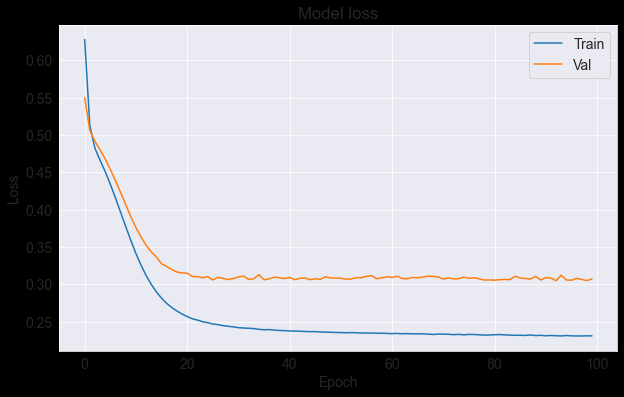

In [28]:
#VISUALIZATION OF THE TRAINING LOSS AND THE VALIDATION LOSS FOR THE MODEL
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

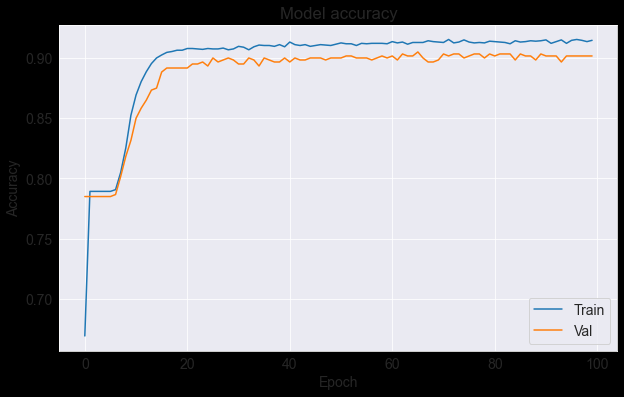

In [29]:
#VISUALIZATION OF THE TRAINING ACCURACY AND VALIDATION ACCURACY
#FROM THIS GRAPH, THE SIGNIFICANT VARIATION BETWEEN THE TRAINING ACCURACY AND THE VALIDATION ACCURACY SIGNIFIES THAT THE MODEL IS SOMEWHAT OVERFITTING THE DATA. 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [32]:
#DEFINING A SECOND MODEL, THAT USES REGULARIZATION TO MINIMIZE OVERFITTING AND IMPROVE THE GENERAL ACCURACY. 
#THE ARCHITECTURE
loan_model_2 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(11,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
loan_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              12000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1000)             

In [33]:
loan_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
              
hist_2 = loan_model_2.fit(X_train, Y_train, batch_size=100, epochs=30, validation_data=(X_val, Y_val))
predictions = loan_model_2.predict(X_val)

Epoch 1/30
28/28 [==============================] - 7s 116ms/step - loss: 15.4954 - accuracy: 0.7832 - val_loss: 5.1545 - val_accuracy: 0.7850
Epoch 2/30
28/28 [==============================] - 3s 103ms/step - loss: 2.2766 - accuracy: 0.8686 - val_loss: 0.8076 - val_accuracy: 0.8717
Epoch 3/30
28/28 [==============================] - 3s 105ms/step - loss: 0.5406 - accuracy: 0.8975 - val_loss: 0.4905 - val_accuracy: 0.8817
Epoch 4/30
28/28 [==============================] - 3s 105ms/step - loss: 0.4199 - accuracy: 0.9029 - val_loss: 0.4475 - val_accuracy: 0.8900
Epoch 5/30
28/28 [==============================] - 3s 103ms/step - loss: 0.3987 - accuracy: 0.9043 - val_loss: 0.4494 - val_accuracy: 0.8883
Epoch 6/30
28/28 [==============================] - 3s 104ms/step - loss: 0.3916 - accuracy: 0.9079 - val_loss: 0.4309 - val_accuracy: 0.8967
Epoch 7/30
28/28 [==============================] - 3s 112ms/step - loss: 0.3938 - accuracy: 0.9061 - val_loss: 0.4296 - val_accuracy: 0.8917
Epoch

In [34]:
#MODEL EVALUATION
loan_model_2.evaluate(X_test, Y_test)[1]

19/19 [==============================] - 1s 19ms/step - loss: 0.4144 - accuracy: 0.8850


0.8849999904632568

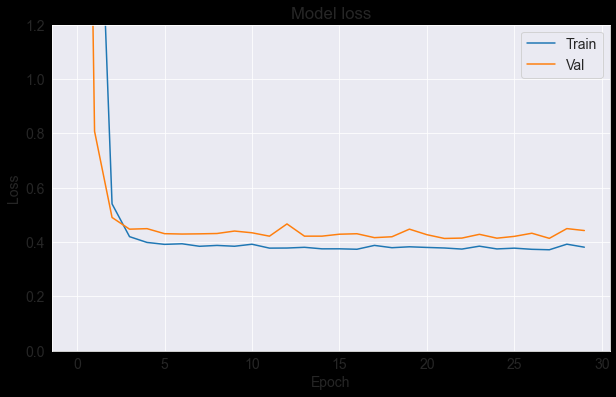

In [35]:
#VISUALIZATION OF THE TRAINING LOSS AND THE VALIDATION LOSS FOR THE MODEL
#CLEARLY, THE MODEL DOES SEEM TO PERFORM BETTER
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

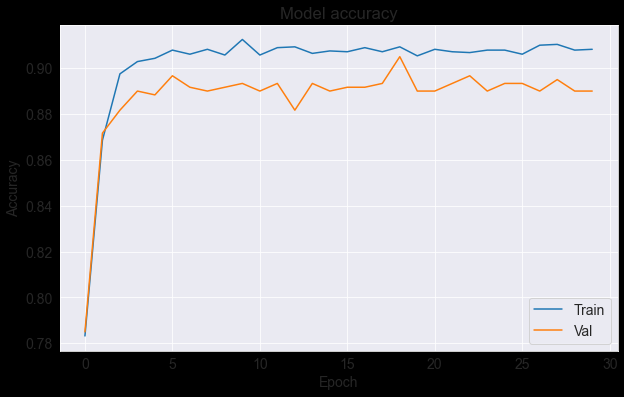

In [36]:
#VISUALIZATION OF THE TRAINING ACCURACY AND THE VALIDATION ACCURACY
#ALTHOUGH THE MODEL STILL SEEMS TO OVERFIT THE DATA, THERE IS A SIGNIFICANT IMPROVEMENT WHEN COMPARED TO THE FIRST MODEL
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [37]:
#THE MODEL ALSO REGISTERS A LOWER MEAN SQUARED ERROR COMPARED TO THE FIRST MODEL. 
#THE M.A.E IS BIGGER COMPARED TO THE 20% MAE REGISTERED BY THE SVM MODEL
mean_absolute_error(Y_val, predictions)

0.15857659369707108

In [38]:
mean_squared_error(Y_val, predictions)
math.sqrt(mean_squared_error(Y_val, predictions))

0.30305234613896836

In [39]:
m = metrics.Precision()
m.update_state(Y_val, predictions)
m.result().numpy()

0.8857143

In [40]:
m_1 = metrics.Recall()
m_1.update_state(Y_val, predictions)
m_1.result().numpy()

0.9872612

In [41]:
loan_model_2.save('loan_determinant_ANN', save_format='tf')

INFO:tensorflow:Assets written to: loan_determinant_ANN\assets
